In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Sentiment140 CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

# The dataset contaings columns:
# 0 - sentiment label (0 for negative, 4 for positive)
#

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re

# Load Sentiment140 CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

# Add proper column names
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Clean the tweet text
def clean_text(text):
  # Remove URLS, mentions (@user), and extra spaces
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)   # Remove URLS
  text = re.sub(r'@\w', '', text)   # Remove mentions (@user)
  text = re.sub(r'\s', ' ', text)   # Remove extra spaces
  return text

# Apply cleaning function
data['text'] = data['text'].apply(clean_text)

# Now, the dataset is cleaned, and you can split it into training and testing sets
X = data['text']
y = data['sentiment']

# Split into train and tests sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the first few rows of the cleaned data
print(data.head())

# Check the shape of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")




   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  witchfoot  - A that's a bummer.  You shoulda g...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  enichan I dived many times for the ball. Manag...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  ationwideclass no, it's not behaving at all. i...  
Training data shape: (1280000,)
Test data shape: (320000,)


In [ ]:
import os
import numpy as np
import cv2

# Path to the extracted FER-2013 dataset
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013'

# Paths to the train and test folders
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

# Initialize lists for image data and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Define the emotion labels
emotion_labels = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'neutral',
    6: 'surprise'
}

def load_images_from_folder(folder, label):
  # Initialize lists for image data and labels
  images = []
  labels = []

  # Loop through the images in each emotion folder
  for filename in os.listdir(folder):
    img_path = os.path.join(folder, filename)
    if filename.endswith('.jpg'): # Only load .jpg images
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        # Resize image to 48x48 pixels (standard for FER-2013)
        img = cv2.resize(img, (48, 48))
        images.append(img)
        labels.append(label)
  return images, labels

# Load images for each emotion category (train)
for label in range(7):  # There are 7 emotion labels in FER-2013
  emotion_folder = os.path.join(train_folder, emotion_labels[label])
  images, labels = load_images_from_folder(emotion_folder, label)
  train_images.extend(images)
  train_labels.extend(labels)

# Load images for each emotion category (test)
for label in range(7):  # There are 7 emotion labels in FER-2013
  emotion_folder = os.path.join(test_folder, emotion_labels[label])
  images, labels = load_images_from_folder(emotion_folder, label)
  test_images.extend(images)
  test_labels.extend(labels)

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Normalize image data to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to include a single channel for grayscale (48x48x1)
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Verify the data shape
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (28120, 48, 48, 1)
Test data shape: (7178, 48, 48, 1)
Training labels shape: (28120,)
Test labels shape: (7178,)


In [ ]:
import tensorflow as tf
import torch
import platform

# Check TensorFlow version and GPU availability
print(f"TensorFlow version: {tf.__version__}")
tf_gpus = tf.config.list_physical_devices('GPU')
if tf_gpus:
    print(f"Is GPU available for TensorFlow? {tf_gpus}")
else:
    print("No GPU found for TensorFlow.")

# Check PyTorch version and GPU availability
print(f"PyTorch version: {torch.__version__}")
if torch.cuda.is_available():
    print("Is GPU available for PyTorch? True")
    print(f"GPU count: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()} - {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("No GPU found for PyTorch.")

# Check Python version
print(f"Python version: {platform.python_version()}")


TensorFlow version: 2.18.0
Is GPU available for TensorFlow? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
PyTorch version: 2.5.1+cu124
Is GPU available for PyTorch? True
GPU count: 1
Current GPU: 0 - Tesla T4
Python version: 3.11.11


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv"
columns = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv(file_path, encoding="ISO-8859-1", names=columns)

# Convert sentiment labels to readable format
sentiment_mapping = {0: "Negative", 2: "Neutral", 4: "Positive"}
df["sentiment"] = df["sentiment"].map(sentiment_mapping)

# Display sample tweets
num_samples = 20  # Number of tweets to display
sampled_tweets = df.sample(num_samples, random_state=42)[["sentiment", "text"]]

# Print results
print(sampled_tweets.to_string(index=False))


sentiment                                                                                                                                      text
 Negative                                                                                                    @chrishasboobs AHHH I HOPE YOUR OK!!! 
 Negative                                                                                 @misstoriblack cool , i have no tweet apps  for my razr 2
 Negative @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
 Negative                                               School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
 Negative                                                                                                                    upper airways problem 
 Negative                                                                                                Going t

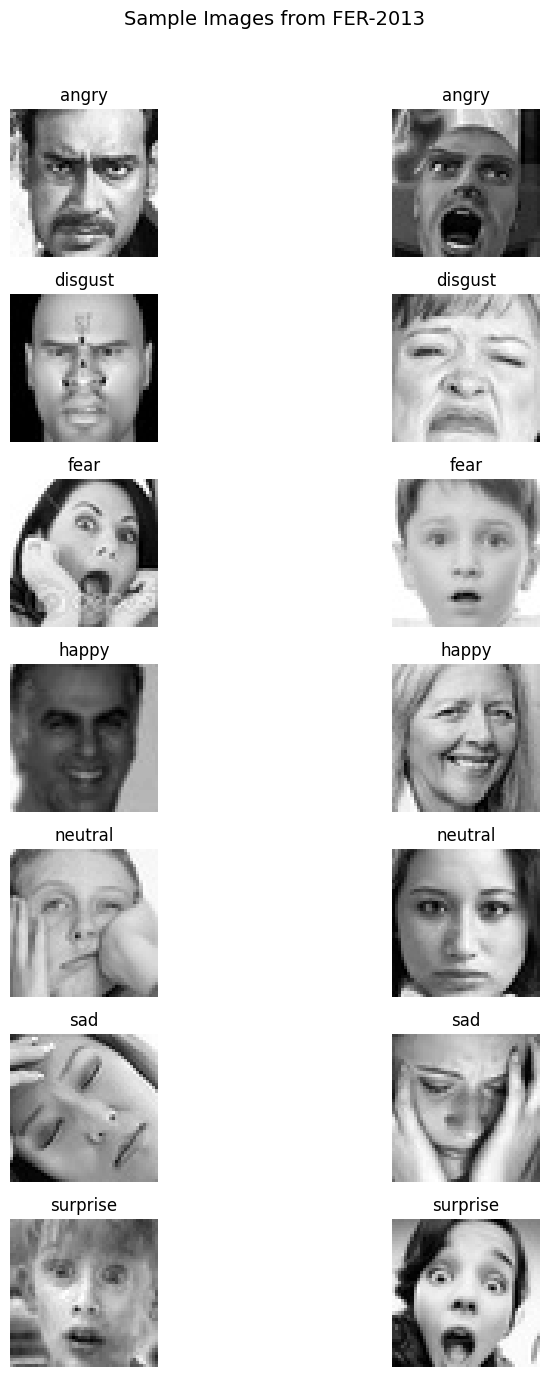

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Define dataset path
dataset_path = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013"  # Update this path if needed

# Define emotions (folder names should match)
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Function to load and display sample images
def visualize_fer_images(dataset_path, num_samples=2):
    fig, axes = plt.subplots(len(emotions), num_samples, figsize=(10, 14))
    fig.suptitle("Sample Images from FER-2013", fontsize=14)

    for i, emotion in enumerate(emotions):
        emotion_path = os.path.join(dataset_path, "train", emotion)  # Change to "test" if needed
        image_files = os.listdir(emotion_path)

        # Select random images
        selected_images = random.sample(image_files, min(num_samples, len(image_files)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                axes[i, j].imshow(img, cmap="gray")
                axes[i, j].set_title(emotion)
                axes[i, j].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Run visualization
visualize_fer_images(dataset_path)


In [ ]:
import os
import pandas as pd
from collections import Counter
from PIL import Image

# ================= SENTIMENT140 DATASET LOADING ================= #

# Define file path (Update if necessary)
sentiment140_path = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv"

# Define column names (since dataset lacks a header)
columns = ["sentiment", "id", "date", "query", "user", "text"]

# Load the dataset
df_sentiment = pd.read_csv(sentiment140_path, encoding="ISO-8859-1", names=columns)

# Convert sentiment labels to readable format
sentiment_mapping = {0: "Negative", 2: "Neutral", 4: "Positive"}
df_sentiment["sentiment"] = df_sentiment["sentiment"].map(sentiment_mapping)

# Display dataset information
print("Sentiment140 Dataset Loaded!")
print(df_sentiment["sentiment"].value_counts())
print(df_sentiment.head())

# ================= FER-2013 DATASET LOADING ================= #

# Define FER-2013 dataset path (Update if necessary)
fer_data_path = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013"

# Define emotion categories (Based on folder structure)
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Function to count images in each emotion category
def count_images(data_path):
    image_count = {}
    for category in emotion_labels:
        category_path = os.path.join(data_path, category)
        if os.path.exists(category_path):
            image_count[category] = len(os.listdir(category_path))
        else:
            image_count[category] = 0
    return image_count

# Count images in train and test sets
train_counts = count_images(os.path.join(fer_data_path, "train"))
test_counts = count_images(os.path.join(fer_data_path, "test"))

# Display image counts per category
print("\nFER-2013 Dataset Loaded!")
print("Training Set:", train_counts)
print("Testing Set:", test_counts)


Sentiment140 Dataset Loaded!
sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64
  sentiment          id                          date     query  \
0  Negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  Negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  Negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  Negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  Negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

FER-2013 Dataset Loaded!
Training Set: {'angry': 3995, 'disgu

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths
base_dir = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image dimensions
IMG_SIZE = 48  # FER-2013 images are originally 48x48

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0,1]
    rotation_range=10,  # Rotate images randomly by 10 degrees
    width_shift_range=0.1,  # Shift width by 10% randomly
    height_shift_range=0.1,  # Shift height by 10% randomly
    horizontal_flip=True,  # Flip images horizontally
    zoom_range=0.1,  # Zoom in randomly by 10%
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only normalize test data

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical"
)

# Verify dataset structure
print(f"Training classes: {train_generator.class_indices}")
print(f"Test classes: {test_generator.class_indices}")


Found 28120 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Test classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [3]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Define file path
file_path = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv"

# Load dataset
columns = ["target", "id", "date", "flag", "user", "text"]
df = pd.read_csv(file_path, encoding="latin-1", names=columns)

# Keep only necessary columns
df = df[["target", "text"]]

# Convert labels (0 = Negative, 2 = Neutral, 4 = Positive) to categorical
df["target"] = df["target"].map({0: 0, 2: 1, 4: 2})

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning
df["clean_text"] = df["text"].apply(clean_text)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Keep top 10,000 words
tokenizer.fit_on_texts(df["clean_text"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["clean_text"])

# Padding sequences to ensure equal length
max_length = 50  # Adjust based on dataset
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

# Convert to NumPy arrays
X = np.array(padded_sequences)
y = np.array(df["target"])

# Save processed data
np.save("X.npy", X)
np.save("y.npy", y)

print(f"Dataset processed: {X.shape} samples with {max_length} words each")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset processed: (1600000, 50) samples with 50 words each


In [4]:
import os
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.data import Dataset
from PIL import Image

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# --- IMAGE PREPROCESSING (FER-2013) ---
IMG_SIZE = 48  # FER-2013 image size
BATCH_SIZE = 32
FER_PATH = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013"

# Data augmentation for training images
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

def load_fer_data():
    train_data = image_generator.flow_from_directory(
        os.path.join(FER_PATH, "fer-2013/train"),
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=BATCH_SIZE
    )

    test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
        os.path.join(FER_PATH, "fer-2013/test"),
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=BATCH_SIZE
    )

    return train_data, test_data

# --- TEXT PREPROCESSING (Sentiment140) ---
TEXT_PATH = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv"
MAX_WORDS = 10000
MAX_LENGTH = 50

# Load Sentiment140 data
columns = ["target", "id", "date", "flag", "user", "text"]
df = pd.read_csv(TEXT_PATH, encoding="latin-1", names=columns)
df = df[["target", "text"]]

# Convert labels to categorical
df["target"] = df["target"].map({0: 0, 2: 1, 4: 2})
df["target"] = to_categorical(df["target"], num_classes=3)

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df["clean_text"] = df["text"].apply(clean_text)

# Tokenization
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_text"])
sequences = tokenizer.texts_to_sequences(df["clean_text"])

# Padding
X_text = pad_sequences(sequences, maxlen=MAX_LENGTH, padding="post", truncating="post")
y_text = np.array(df["target"])

# --- COMBINE IMAGE AND TEXT DATASETS ---
def create_combined_dataset():
    train_images, test_images = load_fer_data()

    text_dataset = Dataset.from_tensor_slices((X_text, y_text)).batch(BATCH_SIZE)

    return train_images, test_images, text_dataset

# Execute pipeline
train_images, test_images, text_dataset = create_combined_dataset()

print("Image and text datasets prepared successfully!")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Found 28120 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Image and text datasets prepared successfully!


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the base directory of the fer2013 dataset
base_dir = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013'

# Paths to the 'train' and the new 'validation' directories
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013/train')
val_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013/validation')

# Create the validation directory if it doesn't exist
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# List the emotion folders (these should be the 7 folders inside train)
emotion_folders = os.listdir(train_dir)

# Split the data from each emotion folder
for emotion in emotion_folders:
    # Paths for the current emotion folder in train and validation
    emotion_train_path = os.path.join(train_dir, emotion)
    emotion_val_path = os.path.join(val_dir, emotion)

    # Create the emotion subdirectory in the validation folder if it doesn't exist
    if not os.path.exists(emotion_val_path):
        os.makedirs(emotion_val_path)

    # Get a list of all images in the emotion folder
    images = os.listdir(emotion_train_path)

    # Split the images into training and validation sets (80-20 split)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move the validation images into the validation folder
    for image in val_images:
        # Full path to the image file
        src = os.path.join(emotion_train_path, image)
        dest = os.path.join(emotion_val_path, image)

        # Move the image
        shutil.move(src, dest)

    print(f"Moved {len(val_images)} images from {emotion} to validation folder.")

print("Validation directory created and data moved successfully.")


Moved 799 images from angry to validation folder.
Moved 820 images from fear to validation folder.
Moved 88 images from disgust to validation folder.
Moved 1326 images from happy to validation folder.
Moved 993 images from neutral to validation folder.
Moved 966 images from sad to validation folder.
Moved 635 images from surprise to validation folder.
Validation directory created and data moved successfully.


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model using VGG16 as the base
def build_cnn_model(input_shape=(48, 48, 3), num_classes=7):
    model = models.Sequential()

    # Add a VGG16-like architecture with modifications
    # 1. Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # 2. Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # 3. Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # 4. Convolutional Layer 4
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # 5. Flatten the output from the previous convolution layers
    model.add(layers.Flatten())

    # 6. Fully Connected Layer 1
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))  # Add dropout to reduce overfitting

    # 7. Fully Connected Layer 2
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer

    # 8. Final Output Layer - 7 neurons for 7 emotions, softmax activation
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = build_cnn_model()

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 655,047 (2.50 MB)

 Trainable params: 654,087 (2.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths for the dataset directories (train, validation, and test directories)
train_dir = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013/train"  # Replace with your train path
valid_dir = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013/validation"  # Replace with your validation path
test_dir = "/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013/test"    # Replace with your test path

# Define image size (48x48 as per the CNN input)
img_size = (48, 48)

# Preprocessing and data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill pixels that are created during transformations
)

# Preprocessing for the validation and test sets (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generator for the training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,  # Resize images to 48x48
    batch_size=32,  # Batch size
    class_mode='categorical',  # Since we have multiple classes (7 emotions)
    shuffle=True  # Shuffle the training data
)

# Create generator for the validation set
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle validation data for evaluation
)

# Create generator for the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Do not shuffle test data for evaluation
)

# Print summary of the number of classes and image sizes
print("Training data summary:", train_generator.class_indices)
print("Validation data summary:", validation_generator.class_indices)
print("Test data summary:", test_generator.class_indices)


Found 22493 images belonging to 7 classes.
Found 5660 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training data summary: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation data summary: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Test data summary: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
# Train the CNN model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Change the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Optionally save the model after training
model.save('emotion_cnn_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 97/702 ━━━━━━━━━━━━━━━━━━━━ 1:18:21 8s/step - accuracy: 0.1823 - loss: 2.4121

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Function to load and display some sample images from a directory
def load_and_display_images(generator, num_images=5):
    images, labels = next(generator)  # Get a batch of images and labels
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i])  # Display the image
        axes[i].axis('off')  # Turn off axis for better display
        # Get the label
        label = np.argmax(labels[i])
        axes[i].set_title(f"Label: {label}")  # Display the label
    plt.show()

# Show a few samples from the training data
print("Displaying some training images:")
load_and_display_images(train_generator, num_images=5)

# Show a few samples from the validation data
print("Displaying some validation images:")
load_and_display_images(validation_generator, num_images=5)

# Show a few samples from the test data
print("Displaying some test images:")
load_and_display_images(test_generator, num_images=5)

# Show a summary of your model
print("\nModel Summary:")
model.summary()
